In [1]:
import numpy as np
import pandas as pd
from laser_core.propertyset import PropertySet
import matplotlib.pyplot as plt
import itertools
import math
from scipy.optimize import fsolve
import scipy.fftpack as fftpack

from laser_generic import Model
from laser_generic import Infection
from laser_generic import Susceptibility
from laser_generic import Transmission
from laser_generic import Births_ConstantPop
from laser_generic.importation import Infect_Random_Agents

from laser_generic.utils import set_initial_susceptibility_randomly
from laser_generic.utils import seed_infections_randomly

f"{np.__version__=}"

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


"np.__version__='1.26.4'"

OK, in testing here, we run into a couple of challenges, and my training in spectral
analysis is a bit old at this point.  Mainly, we're interested in relatively low-frequency
signals relative to our vector length - periods that can be order a few years in a sequence of a few decades,
so only a few oscillations.  Not impossible but tough
Second is that there are lots of other signals that will probably settle down over
time, but may not.  Lastly, there seem to be some windowing effects from the length of the
vector itself.
So some approaches to get arounds this:
Try to start relatively close to equilibrium
Use time-domain autocorrelation spectrum 
Instead of looking for the period of maximum power, specifically look for a peak in the vicinity of 
the expected period.


In [2]:
scenario = pd.DataFrame(data=[["homenode", 2e6]], columns=["name", "population"])
parameters = PropertySet({"seed": 4, "nticks": 36500, "verbose": True, "beta": 0.4, "inf_mean": 12, "cbr": 45, "importation_period": 180, "importation_count": 3})

2025-01-06 16:49:27.731743: Creating the generic model…
Initializing the generic model with 1 patches…
2025-01-06 16:49:27.773786: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:20<00:00, 451.38it/s]


Completed the generic model at 2025-01-06 16:50:48.639775…
Model               :       202,539 µs
Births_ConstantPop  :     6,938,565 µs
Susceptibility      :     3,324,423 µs
Transmission        :    58,735,008 µs
Infection           :    10,683,874 µs
Infect_Random_Agents:       104,619 µs
Total:                   79,989,028 microseconds
2025-01-06 16:50:48.678529: Creating the generic model…
Initializing the generic model with 1 patches…
2025-01-06 16:50:48.705610: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [02:25<00:00, 251.02it/s]


Completed the generic model at 2025-01-06 16:53:14.112333…
Model               :       217,495 µs
Births_ConstantPop  :     8,905,153 µs
Susceptibility      :     3,371,995 µs
Transmission        :   118,026,845 µs
Infection           :    13,591,721 µs
Infect_Random_Agents:       101,260 µs
Total:                  144,214,469 microseconds
2025-01-06 16:53:14.145998: Creating the generic model…
Initializing the generic model with 1 patches…
2025-01-06 16:53:14.230817: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:39<00:00, 365.30it/s]

Completed the generic model at 2025-01-06 16:54:54.150618…
Model               :       208,589 µs
Births_ConstantPop  :     7,511,134 µs
Susceptibility      :     3,361,512 µs
Transmission        :    76,866,617 µs
Infection           :    10,888,402 µs
Infect_Random_Agents:       101,836 µs
Total:                   98,938,090 microseconds
2025-01-06 16:54:54.181639: Creating the generic model…
Initializing the generic model with 1 patches…


2025-01-06 16:54:54.213443: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:30<00:00, 405.49it/s]

Completed the generic model at 2025-01-06 16:56:24.229606…
Model               :       203,403 µs
Births_ConstantPop  :     7,386,054 µs
Susceptibility      :     3,370,142 µs
Transmission        :    67,334,994 µs
Infection           :    10,715,695 µs
Infect_Random_Agents:        99,982 µs
Total:                   89,110,270 microseconds
2025-01-06 16:56:24.259720: Creating the generic model…
Initializing the generic model with 1 patches…
2025-01-06 16:56:24.288714: Running the generic model for 36500 ticks…



100%|██████████| 36500/36500 [02:17<00:00, 266.32it/s]

Completed the generic model at 2025-01-06 16:58:41.343773…
Model               :       214,354 µs
Births_ConstantPop  :     9,343,004 µs
Susceptibility      :     3,385,913 µs
Transmission        :   109,400,063 µs
Infection           :    13,494,287 µs
Infect_Random_Agents:       100,018 µs
Total:                  135,937,639 microseconds
2025-01-06 16:58:41.373542: Creating the generic model…
Initializing the generic model with 1 patches…


2025-01-06 16:58:41.405234: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:24<00:00, 433.69it/s]

Completed the generic model at 2025-01-06 17:00:05.567097…
Model               :       197,978 µs
Births_ConstantPop  :     6,936,486 µs
Susceptibility      :     3,350,941 µs
Transmission        :    61,996,287 µs
Infection           :    10,706,341 µs
Infect_Random_Agents:       101,722 µs
Total:                   83,289,755 microseconds
2025-01-06 17:00:05.596949: Creating the generic model…
Initializing the generic model with 1 patches…


2025-01-06 17:00:05.631183: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:26<00:00, 423.53it/s]


Completed the generic model at 2025-01-06 17:01:31.814267…
Model               :       195,067 µs
Births_ConstantPop  :     7,151,146 µs
Susceptibility      :     3,259,910 µs
Transmission        :    62,867,472 µs
Infection           :    11,718,051 µs
Infect_Random_Agents:       101,786 µs
Total:                   85,293,432 microseconds
2025-01-06 17:01:31.846784: Creating the generic model…
Initializing the generic model with 1 patches…
2025-01-06 17:01:31.880412: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:19<00:00, 458.99it/s]

Completed the generic model at 2025-01-06 17:02:51.403984…
Model               :       212,335 µs
Births_ConstantPop  :     7,698,146 µs
Susceptibility      :     3,372,643 µs
Transmission        :    57,179,830 µs
Infection           :    10,059,160 µs
Infect_Random_Agents:       109,403 µs
Total:                   78,631,517 microseconds
2025-01-06 17:02:51.435542: Creating the generic model…


Initializing the generic model with 1 patches…
2025-01-06 17:02:51.467035: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:31<00:00, 397.59it/s]

Completed the generic model at 2025-01-06 17:04:23.270990…
Model               :       205,798 µs
Births_ConstantPop  :     6,581,061 µs
Susceptibility      :     3,389,629 µs
Transmission        :    69,509,955 µs
Infection           :    11,059,192 µs
Infect_Random_Agents:       103,001 µs
Total:                   90,848,636 microseconds
2025-01-06 17:04:23.302009: Creating the generic model…
Initializing the generic model with 1 patches…


2025-01-06 17:04:23.335266: Running the generic model for 36500 ticks…


100%|██████████| 36500/36500 [01:53<00:00, 321.46it/s]


Completed the generic model at 2025-01-06 17:06:16.883133…
Model               :       213,425 µs
Births_ConstantPop  :     9,424,323 µs
Susceptibility      :     3,239,052 µs
Transmission        :    85,888,928 µs
Infection           :    13,649,272 µs
Infect_Random_Agents:       105,890 µs
Total:                  112,520,890 microseconds


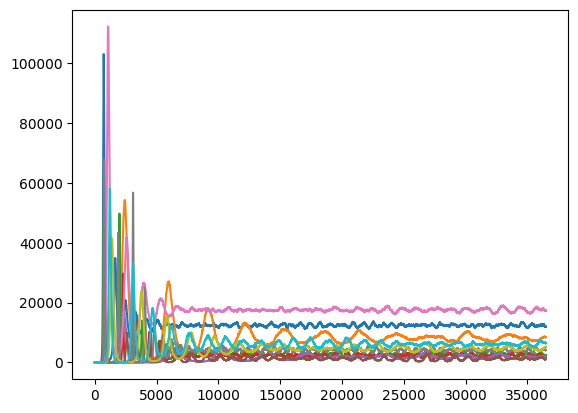

In [24]:
import os

nsims = 10
nticks = 36500
cbrs = 15+85*np.random.rand(nsims)
inf_means = 5+45*np.random.rand(nsims)
R0s = 1.5+8.5*np.random.rand(nsims)
mu = [((1+cbr/1000)**(1/365)-1) for cbr in cbrs]
A = [1/((R0-1)*mu) / 365 for R0, mu in zip(R0s, mu)]
G = [1/(mu + 1/inf_mean) / 365 for mu, inf_mean in zip(mu, inf_means)]
T_exp = [2*math.pi*np.sqrt(A*G) for A, G in zip(A, G)]
mycases = np.zeros((nsims, nticks))
params_df = pd.DataFrame({
    'cbr': cbrs,
    'inf_mean': inf_means,
    'R0': R0s,
    'A': A,
    'G': G,
    'T_exp': T_exp,
})
i = 0
for cbr, inf_mean, R0 in zip(cbrs, inf_means, R0s):
    mu = ((1+cbr/1000)**(1/365)-1)
    parameters = PropertySet({
        "seed": 2, 
        "nticks": 36500, 
        "verbose": True, 
        "beta": R0*(mu + 1/inf_mean), 
        "inf_mean": inf_mean, 
        "cbr": cbr, 
        "importation_period": 180, 
        "importation_count": 3})
    model = Model(scenario, parameters)
    model.components = [Births_ConstantPop,
        Susceptibility,
        Transmission,
        Infection,
        Infect_Random_Agents,
    ]   

    set_initial_susceptibility_randomly(model, 1/R0+.02)
    seed_infections_randomly(model, ninfections=1)
    model.run()
    plt.plot(model.patches.cases)
    mycases[i] = np.squeeze(model.patches.cases)
    i = i+1

output_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'laser-generic-outputs', 'periodicity'))
os.makedirs(output_folder, exist_ok=True)
params_df.to_csv(os.path.join(output_folder, 'params_df.csv'), index=False)
np.save(os.path.join(output_folder, 'mycases.npy'), mycases)

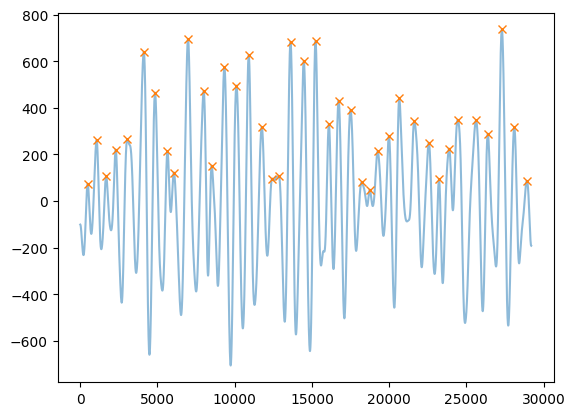

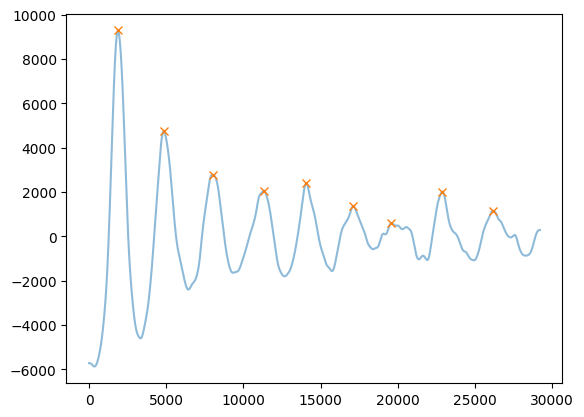

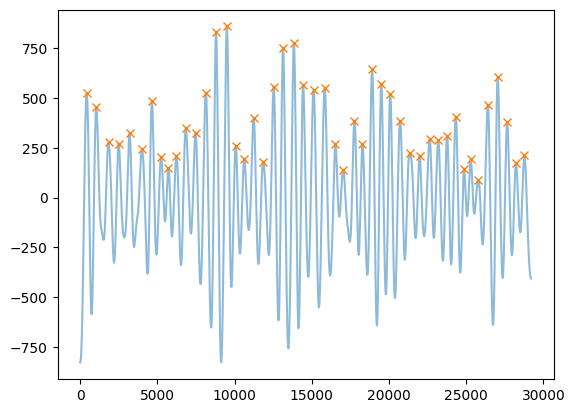

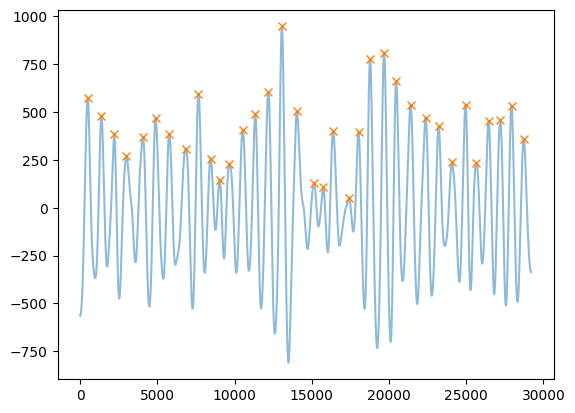

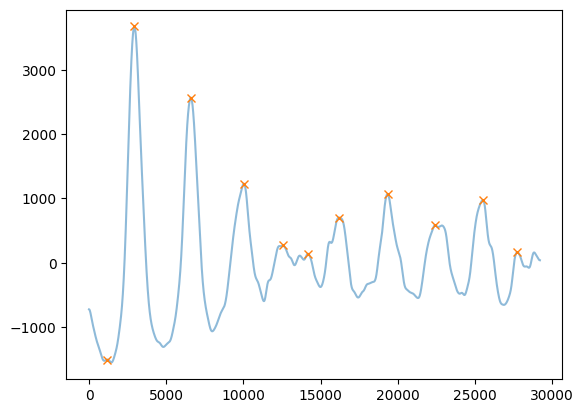

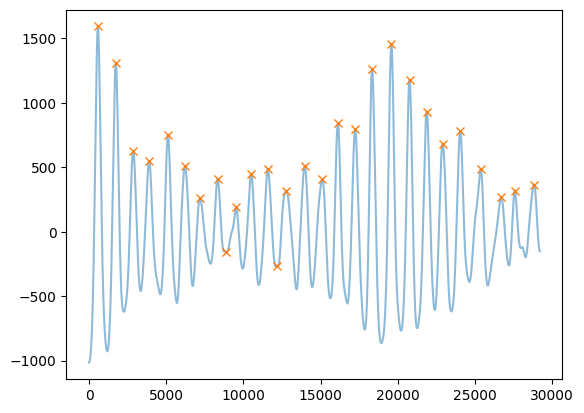

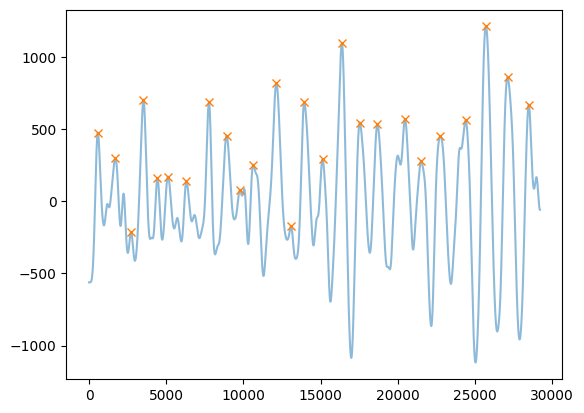

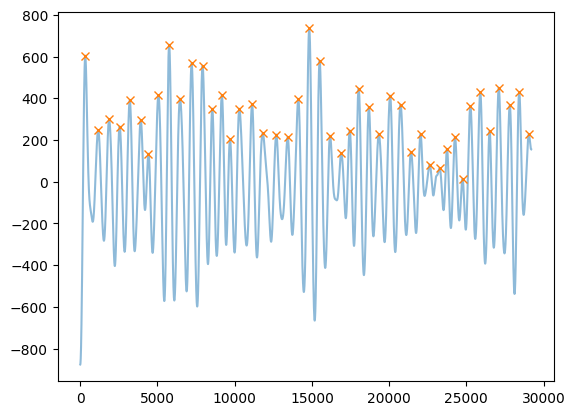

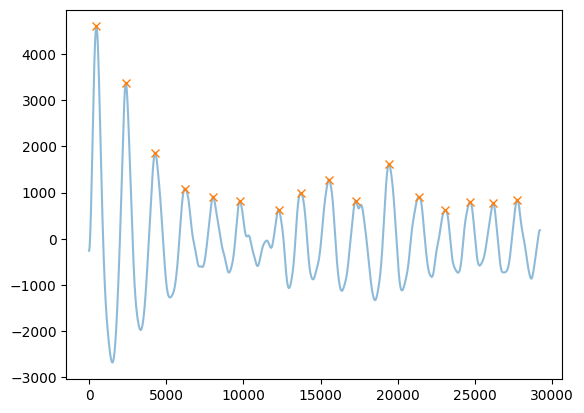

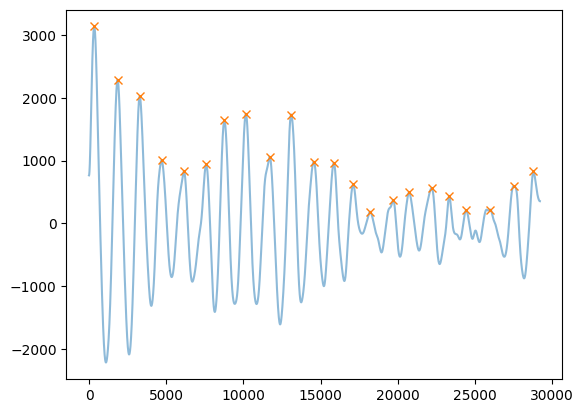

In [25]:
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
params_df['T_obs_peakfinder'] = np.nan
params_df['T_obs_autocorr'] = np.nan

for i in range(10):
    y0 = np.squeeze(mycases[i,:])
    y = y0[7300:]
    y = y-np.mean(y)
    y = gaussian_filter1d(y, sigma=100)
    peaks, _ = find_peaks(y, distance = params_df.loc[i, 'T_exp']*365/2)
    plt.figure()
    plt.plot(y, alpha=0.5)
    plt.plot(peaks, y[peaks], 'x')
    params_df.loc[i, 'T_obs_peakfinder'] = np.median(np.diff(peaks))/365


    # Compute the FFT of the zero-padded signal
    Y1 = np.fft.fft(y0[7300:] - np.mean(y0[7300:]))

    # Compute the circular autocorrelation using the inverse FFT
    circular_autocorr = np.fft.ifft(Y1 * np.conj(Y1)).real
    # Plot only the positive frequency spectrum
    peaks, _ = find_peaks(circular_autocorr, distance = 300)
    params_df.loc[i, 'T_obs_autocorr'] = peaks[0]/365

In [26]:
params_df['mu'] = ((1+params_df['cbr']/1000)**(1/365)-1)

params_df['A'] = 1/((params_df['R0']-1)*params_df['mu'])/365
params_df['T_exp'] = 2*np.pi*np.sqrt(params_df['A']*params_df['G'])

In [27]:
params_df

,cbr,inf_mean,R0,A,G,T_exp,T_obs_peakfinder,T_obs_autocorr,mu
0,91.389442,28.841175,8.144232,1.600386,0.078475,2.226674,2.089041,2.169863,0.000240
1,72.427974,43.599935,1.947351,15.094319,0.118462,8.401885,8.506849,8.249315,0.000192
2,99.292046,7.388431,4.257358,3.242518,0.020204,1.608181,1.695890,1.723288,0.000259
3,54.373102,10.087311,5.493067,4.203290,0.027596,2.139924,2.258904,2.312329,0.000145
4,24.316669,24.917049,2.465888,28.392804,0.068154,8.740374,7.669863,9.580822,0.000066
5,25.335873,11.273769,6.950007,6.717012,0.030863,2.860805,3.046575,3.123288,0.000069
6,78.450087,49.493410,6.040825,2.626415,0.134224,3.730577,3.158904,3.654795,0.000207
7,64.193555,13.921366,8.527873,2.134910,0.038050,1.790810,1.801370,1.797260,0.000170
8,33.428807,32.883485,5.259423,7.139514,0.089826,5.031695,4.997260,5.164384,0.000090
9,61.545651,24.964564,4.007677,5.566341,0.068118,3.868967,3.876712,3.876712,0.000164


In [5]:
mycases[i] = np.squeeze(model.patches.cases)

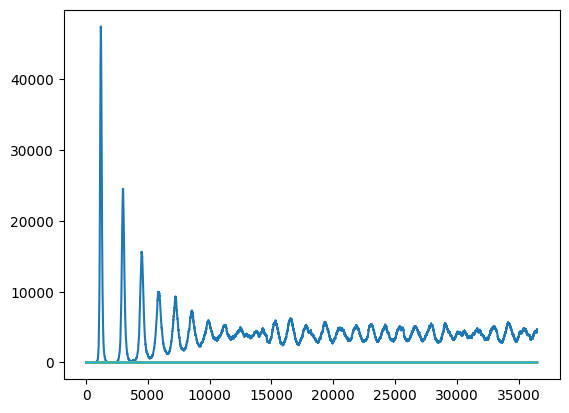